# Logistic Regression with Python

We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).We'll be trying to predict a classification- survival or deceased.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# We check If there is some missing data in the dataset

<AxesSubplot:>

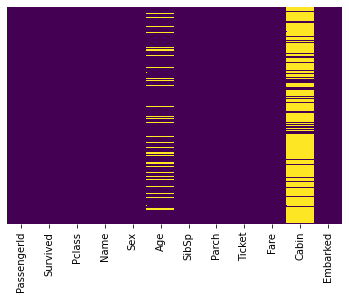

In [9]:
data.isnull()
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# We check how many people survived and how many people died using countplot

<AxesSubplot:xlabel='Survived', ylabel='count'>

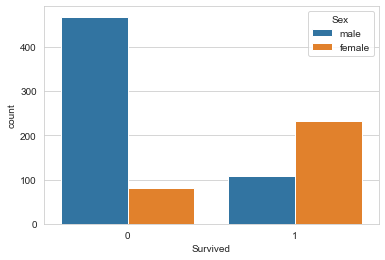

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)

# We see distribuion of age groups

<AxesSubplot:>

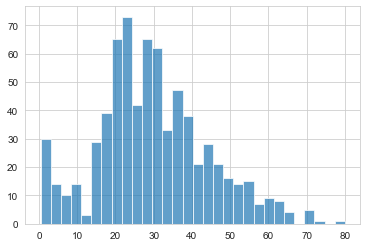

In [17]:
data['Age'].hist(bins=30,alpha=0.7)

# We see Fare Distrivution

<AxesSubplot:>

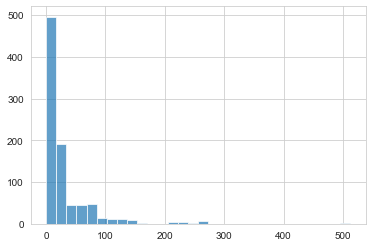

In [19]:
data['Fare'].hist(bins=30,alpha=0.7)

# We will replace the null values above with the average age of passangers in each class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

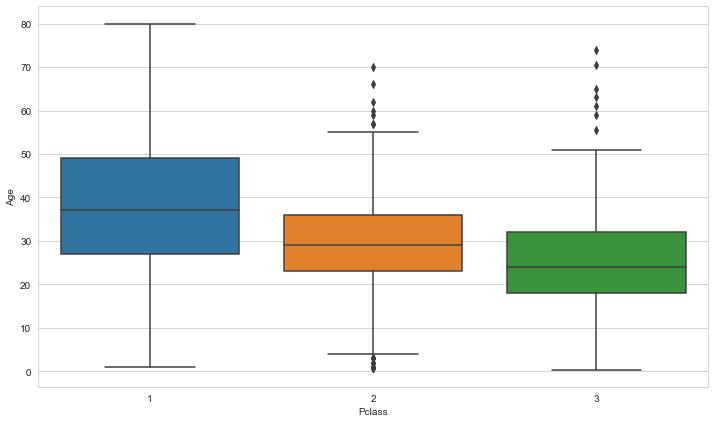

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data)

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
    
    
    
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [27]:
data.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

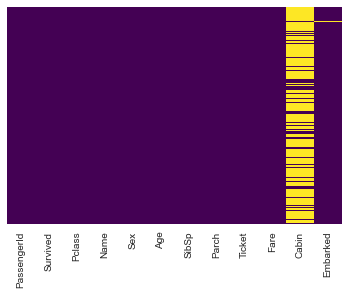

In [28]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Drop the columns not required

In [31]:
data.drop('Cabin',axis=1,inplace=True)

In [30]:
data.dropna(inplace=True)

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 18.9+ KB


In [46]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [47]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [49]:
data = pd.concat([data,sex,embark],axis=1)

In [50]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1


# Split the data into training and testing data

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\administrator\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
## Evaluate the model

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.84      0.88      0.86        41

    accuracy                           0.80        61
   macro avg       0.78      0.76      0.77        61
weighted avg       0.80      0.80      0.80        61

